## 1. Load the data


In [16]:
%load_ext memory_profiler

ModuleNotFoundError: No module named 'memory_profiler'

In [1]:
import pandas as pd

data = pd.read_csv("/Users/coloner/PycharmProjects/Orion_fork/tutorials/data - app.csv")


## Timestamp as time
import numpy as np
timestamps = pd.to_datetime(data['time'])
timestamps = timestamps.values.astype(np.int64)
data['timestamp'] = timestamps


data.drop(columns=['time'], inplace=True)

print(data.head())
print(type(data))

                       app  throughput   latency  not_ready_pods  \
0  abc-ae-accounts-gateway   70.022222  0.016803             0.0   
1  abc-ae-accounts-gateway   70.555556  0.015152             0.0   
2  abc-ae-accounts-gateway   69.133333  0.012976             0.0   
3  abc-ae-accounts-gateway   69.755556  0.015231             0.0   
4  abc-ae-accounts-gateway   70.022222  0.015912             0.0   

   system_error  business_error            timestamp  
0           0.0             0.0  1730983867000000000  
1           0.0             0.0  1730983927000000000  
2           0.0             0.0  1730983987000000000  
3           0.0             0.0  1730984047000000000  
4           0.0             0.0  1730984107000000000  
<class 'pandas.core.frame.DataFrame'>


In [2]:
# Data by services
app = 'rsc-cache'
# columns['timestamp', 'throughput', 'latency', 'not_ready_pods', 'system_error', 'business_error']
filtered_data = data[data['app'] == app]
filtered_data.sort_values(by='timestamp', inplace=True)
filtered_data.drop(columns=['app', 'timestamp'], inplace=True)

filtered_data = filtered_data.reset_index().rename(columns={'index': 'timestamp'})
filtered_data = filtered_data[['timestamp', 'throughput', 'system_error', 'latency', 'business_error', 'not_ready_pods']]
train = filtered_data[20:800]
test = filtered_data[800:]

# In case univariate
train = train.iloc[:,[0,1]]
test = test.iloc[:,[0,1]]
print(f"Train data for service {app}")
print(train.head())

Train data for service rsc-cache
    timestamp   throughput
20     129710  2457.833015
21     129711  2471.647041
22     129712  2440.695397
23     129713  2469.466667
24     129714  2462.005275


/var/folders/9m/nsz6s70j1g10yz3_l77xwl3m0000gn/T/ipykernel_12258/1213927684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.sort_values(by='timestamp', inplace=True)
/var/folders/9m/nsz6s70j1g10yz3_l77xwl3m0000gn/T/ipykernel_12258/1213927684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['app', 'timestamp'], inplace=True)


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data = [[-10], [1], [2], [4]]




In [369]:

print(scaler.fit(train_data))

MinMaxScaler()


In [371]:
test_data = [[-10], [1], [2], [100]]
scaler.transform(test_data)

array([[0.        ],
       [0.78571429],
       [0.85714286],
       [7.85714286]])

In [258]:

filtered_data.columns.values

array(['timestamp', 'throughput', 'system_error', 'latency',
       'business_error'], dtype=object)

In [344]:
# import pprint
# pprint.pprint(orion._mlpipeline.to_dict())

# train.shape


(780, 6)

In [4]:
pipeline = {
    "primitives": [
        "mlstars.custom.timeseries_preprocessing.time_segments_aggregate",
        "sklearn.impute.SimpleImputer",
        "sklearn.preprocessing.MinMaxScaler",
        "mlstars.custom.timeseries_preprocessing.rolling_window_sequences",
        "orion.primitives.timeseries_preprocessing.slice_array_by_dims",
        "orion.primitives.aer.AER",
        "orion.primitives.aer.score_anomalies",
        "orion.primitives.timeseries_anomalies.find_anomalies"
    ],
    "init_params": {
        "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            "time_column": "timestamp",
            "interval": 1,
            "method": "mean"
        },
        "sklearn.preprocessing.MinMaxScaler#1": {
            "feature_range": [
                -1,
                1
            ]
        },
        "mlstars.custom.timeseries_preprocessing.rolling_window_sequences#1": {
            "target_column": 0,
            "window_size": 5,
            "target_size": 1
        },
        "orion.primitives.timeseries_preprocessing.slice_array_by_dims": {
            "target_index": 0,
            "axis": 2
        },
        "orion.primitives.aer.AER#1": {
            "epochs": 10
        },
        "orion.primitives.aer.score_anomalies#1": {
            "rec_error_type": "dtw",
            "comb": "mult",
            "mask": True,
            "lambda_rec": 0.5
        },
        "orion.primitives.timeseries_anomalies.find_anomalies#1": {
            "window_size_portion": 0.33,
            "window_step_size_portion": 0.1,
            "fixed_threshold": True
        }
    },
    "input_names": {
        "orion.primitives.timeseries_anomalies.find_anomalies#1": {
            "index": "index"
        }
    },
    "output_names": {
        "mlstars.custom.timeseries_preprocessing.rolling_window_sequences#1": {
            "index": "X_index",
            "target_index": "y_index"
        }
    }
}

## 2. Detect anomalies

/var/folders/9m/nsz6s70j1g10yz3_l77xwl3m0000gn/T/ipykernel_12258/2697922664.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.sort_values(by='timestamp', inplace=True)
/var/folders/9m/nsz6s70j1g10yz3_l77xwl3m0000gn/T/ipykernel_12258/2697922664.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['app', 'timestamp'], inplace=True)


Train data for service rsc-cache
   timestamp  system_error  business_error   latency   throughput  \
0     129690           0.0             0.0  0.013566  2457.266667   
1     129691           0.0             0.0  0.011970  2472.044444   
2     129692           0.0             0.0  0.014657  2482.727747   
3     129693           0.0             0.0  0.012517  2457.942194   
4     129694           0.0             0.0  0.017167  2475.583991   

   not_ready_pods  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
(1441, 6)
Orion:
    aer
hyperparameters:
    mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1: {'interval': 1}
    orion.primitives.aer.AER#1: {'epochs': 5, 'verbose': True}



/Users/coloner/IdeaProjects/ml/Orion/venv/lib/python3.9/site-packages/sklearn/impute/_base.py:356: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


Epoch 1/5
17/17 [==============================] - 4s 75ms/step - loss: 0.1881 - tf.__operators__.getitem_24_loss: 0.2414 - tf.__operators__.getitem_25_loss: 0.1974 - tf.__operators__.getitem_26_loss: 0.1162 - val_loss: 0.0744 - val_tf.__operators__.getitem_24_loss: 0.1187 - val_tf.__operators__.getitem_25_loss: 0.0121 - val_tf.__operators__.getitem_26_loss: 0.1546
Epoch 2/5
17/17 [==============================] - 1s 36ms/step - loss: 0.0546 - tf.__operators__.getitem_24_loss: 0.0776 - tf.__operators__.getitem_25_loss: 0.0218 - tf.__operators__.getitem_26_loss: 0.0974 - val_loss: 0.0528 - val_tf.__operators__.getitem_24_loss: 0.0389 - val_tf.__operators__.getitem_25_loss: 0.0549 - val_tf.__operators__.getitem_26_loss: 0.0627
Epoch 3/5
17/17 [==============================] - 1s 36ms/step - loss: 0.0401 - tf.__operators__.getitem_24_loss: 0.0535 - tf.__operators__.getitem_25_loss: 0.0264 - tf.__operators__.getitem_26_loss: 0.0541 - val_loss: 0.0436 - val_tf.__operators__.getitem_24_los

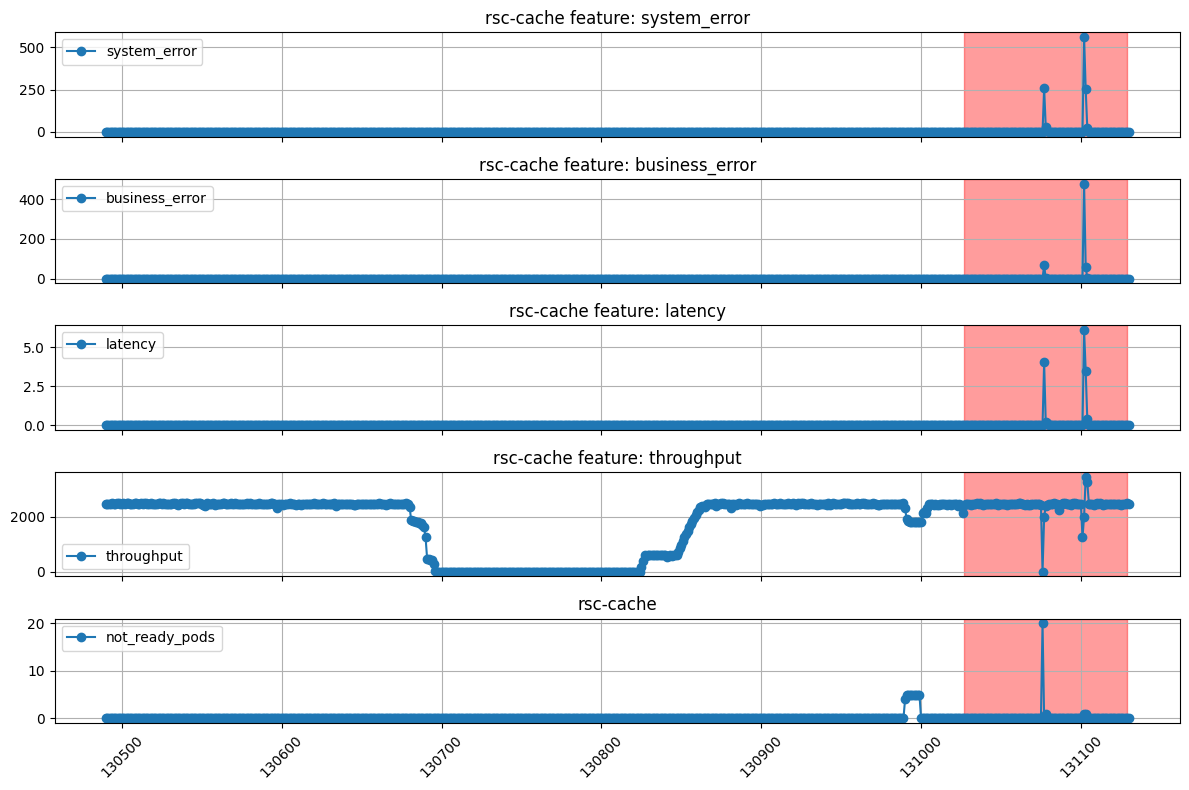

42/42 [==============================] - 0s 4ms/step
    start     end  severity
0  131026  131129   0.52604


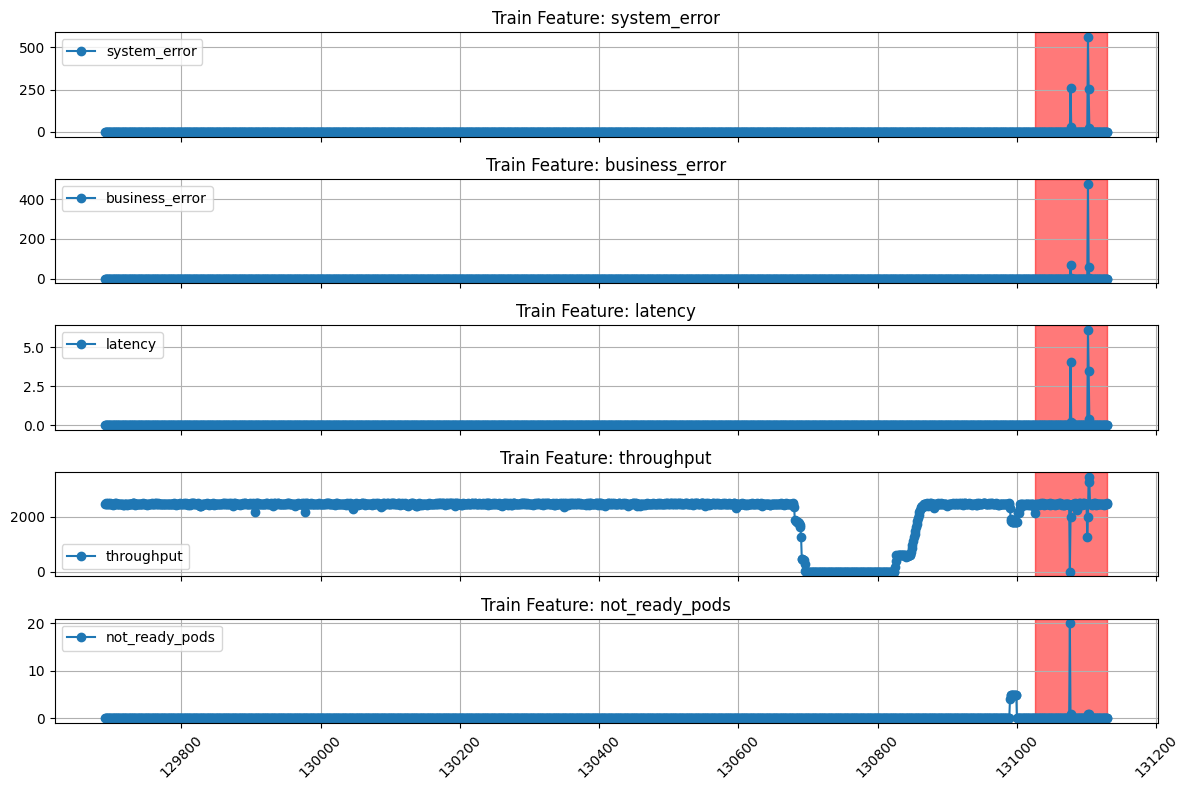

In [17]:
index = 1
import matplotlib.pyplot as plt

for app in  data[data['app'] == "rsc-cache"]['app'].unique():
    try:
        app = 'rsc-cache'
        # Data by services
        # columns['timestamp', 'throughput', 'latency', 'not_ready_pods', 'system_error', 'business_error']
        filtered_data = data[data['app'] == app]
        filtered_data.sort_values(by='timestamp', inplace=True)
        filtered_data.drop(columns=['app', 'timestamp'], inplace=True)
        
        filtered_data = filtered_data.reset_index().rename(columns={'index': 'timestamp'})
        filtered_data = filtered_data[['timestamp', 'system_error', 'business_error','latency', 'throughput',  'not_ready_pods']]
        train = filtered_data
        test = filtered_data[800:]
        
        # In case univariate
        # train = train.iloc[:,[0,1]]
        # test = test.iloc[:,[0,1]]
        print(f"Train data for service {app}")
        print(train.head())
        print(train.shape)
        feature_count = train.shape[1] - 1
        
        
        
        
        from orion import Orion
        
        pipeline_name='aer'
        # pipeline_name=pipeline
        hyperparameters = {
            # "mlstars.custom.timeseries_preprocessing.rolling_window_sequences#1": {
            #     "target_column": 0,
            #     "window_size": 5,
            #     "target_size": 1
            # },
            #  "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            #     'interval': 1
            # },
            
            # anomaly_transformer
            # "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            #     'interval': 1
            # },
            # "orion.primitives.anomaly_transformer.AnomalyTransformer#1": {
            #         "epochs": 5,
            #         "verbose": True
            # },
            
            # vae
            # "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            #     'interval': 1
            # },
            # "orion.primitives.vae.VAE#1": {
            #         "epochs": 5,
            #         "verbose": True
            # },
            
            # tadgan
            # "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            #     'interval': 1
            # },
            # "orion.primitives.tadgan.TadGAN#1": {
            #     "epochs": 5,
            #     "verbose": True
            # },
        
            # matrixprofile
            # univariate
            # "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            #     'interval': 1
            # }
        
            # # lstm_dynamic_threshold
            # "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            #     'interval': 1
            # },
            # "keras.Sequential.LSTMTimeSeriesRegressor#1": {
            #     "epochs": 5,
            #     "verbose": True
            # }
        
        
            # # lstm_autoencoder
            # "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            #     'interval': 1
            # },
            # "keras.Sequential.LSTMSeq2Seq#1": {
            #         "epochs": 5,
            #         "verbose": True,
            #         "window_size": 100,
            #         "input_shape": [100, feature_count],
            #         "target_shape": [100, 1]
            #     },
        
            ## GOOD for latency
            # dense_autoencoder
            # "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            #     'interval': 1
            # },
            # "keras.Sequential.DenseSeq2Seq#1": {
            #     "epochs": 5,
            #     "verbose": True,
            #     "window_size": 100,
            #     "input_shape": [100, feature_count],
            #     "target_shape": [100, 1]
            # },
           
            # arima
            # univariate
            # "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
            #     'interval': 1
            # }
           
            
            # aer
            "mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1": {
                'interval': 1
            },

            'orion.primitives.aer.AER#1': {
                'epochs': 5,
                'verbose': True
            }
        }
        
        orion = Orion(
            pipeline=pipeline_name,
            hyperparameters=hyperparameters
        )
        print(orion)
        
        
        orion.fit(train)
        
        df = test
        anomalies = orion.detect(df)
        print(anomalies.head())
        columns = df.columns.values[1:]
        size = columns.shape[0]
        print(size)
        if size == 1:
            axes = [plt]
            print(axes)
        else:
            fig, axes = plt.subplots(nrows=size, ncols = 1, figsize= (12,8), sharex=True)
        for ax, feature in zip(axes, columns):
            ax.plot(df['timestamp'], df[feature], label=feature, marker='o')
            for _, row in anomalies.iterrows():
                ax.axvspan(row['start'], row['end'], color = 'red', alpha = min(1,row['severity']))
            if size != 1:
                ax.set_title(f"{app} feature: {feature}")
                ax.legend()
            ax.grid(True)
            
        plt.xticks(rotation=45)
        plt.title(app)
        if size != 1:
            plt.tight_layout()
        plt.show()
        
        df = train
        anomalies = orion.detect(df)
        print(anomalies.head())
        columns = df.columns.values[1:]
        columns.shape[0]
        
        if size == 1:
            axes = [plt]
            print(axes)
        else:
            fig, axes = plt.subplots(nrows=size, ncols = 1, figsize= (12,8), sharex=True)
        for ax, feature in zip(axes, columns):
            ax.plot(df['timestamp'], df[feature], label=feature, marker='o')
            for _, row in anomalies.iterrows():
                ax.axvspan(row['start'], row['end'], color = 'red', alpha = min(1,row['severity']))
            if size != 1:
                ax.set_title(f"Train Feature: {feature}")
                ax.legend()
            ax.grid(True)
            
        plt.xticks(rotation=45)
        if size != 1:
            plt.tight_layout()
        plt.show()
        # break
    except Exception:
        print(f"Cannot find anomalies for service { app }")
        raise

In [26]:
anomalies.columns

# df.head()

Index(['start', 'end', 'severity'], dtype='object')

The output will be a ``pandas.DataFrame`` containing a table with the detected anomalies.

In [6]:
df = train
anomalies = orion.detect(df)
print(anomalies.head())
columns = df.columns.values[1:]
columns.shape[0]

if size == 1:
    axes = [plt]
    print(axes)
else:
    fig, axes = plt.subplots(nrows=size, ncols = 1, figsize= (12,8), sharex=True)
for ax, feature in zip(axes, columns):
    ax.plot(df['timestamp'], df[feature], label=feature, marker='o')
    for _, row in anomalies.iterrows():
        ax.axvspan(row['start'], row['end'], color = 'red', alpha = min(1,row['severity']))
    if size != 1:
        ax.set_title(f"Feature: {feature}")
        ax.legend()
    ax.grid(True)
    
plt.xticks(rotation=45)
if size != 1:
    plt.tight_layout()
# plt.show()

In [65]:
# filtered_data['time'] = pd.to_datetime(filtered_data['timestamp'], unit='ns')
to_plot = filtered_data.drop(columns=['timestamp'])

In [1]:
import seaborn as sns
# sns.heatmap(filtered_data.set_index('timestamp').corr(), annot=True, cmap='coolwarm')
# plt.show()

In [83]:
filtered_data.columns

Index(['throughput', 'latency', 'not_ready_pods', 'system_error',
       'business_error', 'timestamp'],
      dtype='object')

In [9]:
%%time
current_start = None
result = []
for i in range(len(labels)):
    if current_start != None and labels.iloc[i]['label'] == 0:
        result.append({"start": current_start, "end" : labels.iloc[i-1]["timestamp"]})
        current_start = None
    elif current_start == None and labels.iloc[i]['label'] == 1:
        current_start = row['timestamp']
if current_start != None:
    result.append({"start": current_start, "end" : labels.iloc[-1]["timestamp"]})

df_range = pd.DataFrame(result)
print(df_range)

    
    
        
    

In [7]:
%%time
df = pd.DataFrame(data)

# Filter rows where label is 1
df_filtered = labels[labels['label'] == 1]

# Identify consecutive groups
df_filtered['group'] = (df_filtered['timestamp'].diff() != 1).cumsum()

# Aggregate start and end of each group
df_range2 = df_filtered.groupby('group').agg(start=('timestamp', 'first'), end=('timestamp', 'last')).reset_index(drop=True)

print(df_range2)

In [8]:
df_filtered['timestamp'].diff() != 1 

In [36]:
labels['timestamp'] = labels['timestamp'].view('int64') 
labels['timestamp'] /= 1000000000
labels['timestamp'] = labels['timestamp'].astype('int64')